In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [15]:
#Load Train Data
df_ = pd.read_csv("data/train_out.csv")
df = df_.copy()

df = df.set_index('game_id')

X = df.drop('bResult', axis=1)
y = df['bResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
#Load Test Data
data_sub = pd.read_csv("data/test_out.csv")
data_sub_ = data_sub.copy()

data_sub_ = data_sub_.set_index('game_id')
X_sub = data_sub_

In [37]:
def bet(row):
    if row['bResult_prob'] < 0.5:
        return 'NO BET'
    else:
        if row['bResult'] == 1:
            return "WIN"
        else:
            return 'LOSS'

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#Fit model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Score Model
y_pred = clf_lr.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6052243608761736

In [100]:
def bet(row):
    if (row['bResult_prob_Loss'] < 0) & (row['bResult_prob_Win'] < 0) :
        return 'NO BET'
    else:
        if row['bResult'] == 1:
            return "WIN"
        else:
            return 'LOSS'

In [101]:
#Generate predictions
probs = clf_lr.predict_proba(X_sub)
predict = clf_lr.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
#X_final['bet'].to_csv('data/Submission_LR.csv')

NO BET    3322
WIN        230
Name: bet, dtype: int64

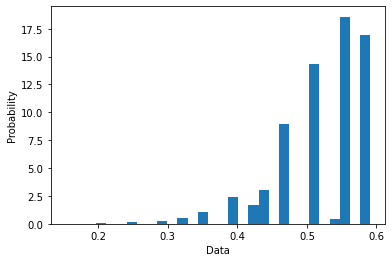

In [88]:
plt.hist(X_final['bResult_prob_Loss'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

#Fit model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
#Score Model
y_pred = clf_dt.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.5630139654052311

In [61]:
#Generate predictions
probs = clf_dt.predict_proba(X_sub)
X_final = X_sub.copy()
X_final['bResult']=probs[:,1]

X_final = X_final[['bResult']]
#X_final.to_csv('data/Submission_DT.csv')
X_final

,bResult
game_id,
9564c32b-dad9-4292-8efb-8fa41f026fe9,0.571429
8160b53f-417a-416c-bd66-41b115e91039,0.333333
5bd6d56b-e337-4f61-83b6-cfe21a481892,0.600000
614fd189-86c9-4f44-9b13-cf980e1ccc9f,1.000000
539f6975-88f2-40ea-8d22-4b500370e971,0.250000
...,...
a59e0afe-9c05-4000-9ec5-c3468f6a473b,0.333333
36ae936c-e159-49b1-96c6-3b8b877269d8,0.461538
8a2f2bb9-c899-4861-b5bb-b44e00d5a309,0.000000


# GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

#Fit model
clf_gd = GradientBoostingClassifier()
clf_gd.fit(X_train, y_train)


GradientBoostingClassifier()

In [63]:
#Score Model
y_pred = clf_gd.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.5627560793406637

In [ ]:
#Generate predictions
probs = clf_gd.predict_proba(X_sub)
X_final = X_sub.copy()
X_final['ARR_DEL15']=probs[:,1]

X_final = X_final[['ARR_DEL15']]
X_final.to_csv('data/Submission_GD.csv')

In [43]:
feature_importances = pd.Series(data=clf_gd.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

DEP_DEL15            0.946608
DEP_HOUR_BIN         0.016175
OP_CARRIER_Encode    0.015772
ARR_HOUR_BIN         0.006466
DISTANCE_BIN         0.004526
DEST_Encode          0.004195
ORIGIN_Encode        0.003483
OP_CARRIER_FL_NUM    0.002774
dtype: float64

# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

#Fit model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [65]:
#Score Model
y_pred = clf_rf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.5624396173853244

In [ ]:
#Generate predictions
probs = clf_rf.predict_proba(X_sub)
X_final = X_sub.copy()
X_final['ARR_DEL15']=probs[:,1]

X_final = X_final[['ARR_DEL15']]
X_final.to_csv('data/Submission_RF.csv')